**CLASSIFICATION OF PROSTRATE AND BREAST TUMORS**

Classification of Prostrate and Breast of tumors in the body based on the following attributes:


*   Age: <30 = 1, 30-59 = 2, >=60 = 3 (integer)
*   Sex: male = 1, female = 2 (nominal)
*   Histologic type: epidermoid = 1, adeno = 2, anaplastic = 3 (nominal)
*   Disease-Class: prostrate = 1 and breast = 0 (binomial)

Number of instances: 339; 
Number of classes from original dataset = 22

DATA SOURCE: www.kaggle.com/amod400/primary-tumor#primary-tumor.names.txt


Our aim is that this classifification will serve as a diagnostic model that can help to



 prevent a lot of unnecessary surgeries due to false negatives in the diagnosis of tumors.

To acheive this, we will apply and compare the following classification methods:



*   K-nearest Neighbors
*   Decision Trees

To begin;













In [0]:
import pandas as pd
import numpy as np


In [0]:
#run to import files or token from kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"obinnaama","key":"2e5b33d811e1b77cea229d8df67d5806"}'}

In [0]:
#Install Kaggle library
!pip install -U -q kaggle
!mkdir -p ~/.Kaggle

!chmod 600 /root/.kaggle/kaggle.json
!cp kaggle.json ~/.kaggle/

!kaggle datasets download -d amod400/primary-tumor


chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
  0% 0.00/3.38k [00:00<?, ?B/s]
100% 3.38k/3.38k [00:00<00:00, 8.63MB/s]


In [0]:
#lets see what's inside
!ls
!unzip primary-tumor.zip -d primary-tumor

kaggle.json  primary-tumor.zip	sample_data
Archive:  primary-tumor.zip
  inflating: primary-tumor/primary-tumor.data.txt  
  inflating: primary-tumor/primary-tumor.names.txt  


Next:

Import tumor data and convert from .txt to csv

In [0]:
tumor_data = pd.read_csv('primary-tumor/primary-tumor.data.txt')
tumor_data.head()
#tumor_data.tail()

,1,1.1,1.2,?,3,2,2.1,1.3,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,2.10,2.11
0,1,1,1,?,3,2,2,2,2,2,1,2,2,2,1,2,1,2
1,1,1,2,2,3,1,2,2,2,2,2,2,2,2,2,2,1,2
2,1,1,2,?,3,1,2,1,1,2,2,2,2,2,2,2,1,2
3,1,1,2,?,3,1,2,1,1,2,2,2,2,2,2,2,1,2
4,1,1,2,?,3,1,2,2,2,2,2,1,2,2,1,1,1,2


Next:

Clean up the data by removing missing data and assign table names

In [0]:
tumor_data = pd.read_csv('primary-tumor/primary-tumor.data.txt', na_values=['?'], names = ['Class', 'age', 'sex', 'histologic-type', 'deg-of-diff','bone', 'bone-marrow', 'lung', 'pleura', 'peritoneum', 'liver', 'brain', 'skin', 'neck', 'supra-clavicular', 'axillar', 'mediasternum', 'abdominal' ])
tumor_data.head(339)

,Class,age,sex,histologic-type,deg-of-diff,bone,bone-marrow,lung,pleura,peritoneum,liver,brain,skin,neck,supra-clavicular,axillar,mediasternum,abdominal
0,1,1,1.0,NaN,3.0,2,2,1,2,2,2,2,2.0,2,2,2.0,2,2
1,1,1,1.0,NaN,3.0,2,2,2,2,2,1,2,2.0,2,1,2.0,1,2
2,1,1,2.0,2.0,3.0,1,2,2,2,2,2,2,2.0,2,2,2.0,1,2
3,1,1,2.0,NaN,3.0,1,2,1,1,2,2,2,2.0,2,2,2.0,1,2
4,1,1,2.0,NaN,3.0,1,2,1,1,2,2,2,2.0,2,2,2.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,22,2,2.0,2.0,NaN,2,2,2,2,2,2,2,2.0,2,2,1.0,2,2
335,22,2,2.0,2.0,NaN,2,2,2,2,2,2,2,2.0,2,2,1.0,2,2
336,22,2,2.0,NaN,NaN,1,2,2,2,2,2,2,2.0,2,1,1.0,2,2
337,22,3,2.0,2.0,2.0,2,2,2,2,2,2,2,2.0,1,1,1.0,2,2


Next:

Since the Class here has 22 classes and we are limiting our classification to binary, now create a new class column with just 2 classes "0 & 1" and randomly assign these two values to the each row

In [0]:
tumor_data['randNumCol'] = np.random.randint(0, 2, tumor_data.shape[0])
tumor_data.head()


,Class,age,sex,histologic-type,deg-of-diff,bone,bone-marrow,lung,pleura,peritoneum,liver,brain,skin,neck,supra-clavicular,axillar,mediasternum,abdominal,randNumCol
0,1,1,1.0,NaN,3.0,2,2,1,2,2,2,2,2.0,2,2,2.0,2,2,0
1,1,1,1.0,NaN,3.0,2,2,2,2,2,1,2,2.0,2,1,2.0,1,2,0
2,1,1,2.0,2.0,3.0,1,2,2,2,2,2,2,2.0,2,2,2.0,1,2,0
3,1,1,2.0,NaN,3.0,1,2,1,1,2,2,2,2.0,2,2,2.0,1,2,1
4,1,1,2.0,NaN,3.0,1,2,1,1,2,2,2,2.0,2,2,2.0,1,2,1


Next:

Rename the new column to 'Disease-class'. Also, not all features of this data will be required for the classification. Hence we will be using only the Disease-Class, age, sex, features that are relevant to this study

In [0]:
tumor_data.rename(columns={"randNumCol": "Disease-Class"}, inplace=True)
#tumor_data[['Disease-Class', 'age', 'sex', 'histologic-type']]



Next:

Check if the data needs cleaning; every model is only as good as the data it's given. 

In [0]:
tumor_data.describe()

,Class,age,sex,histologic-type,deg-of-diff,bone,bone-marrow,lung,pleura,peritoneum,liver,brain,skin,neck,supra-clavicular,axillar,mediasternum,abdominal,Disease-Class
count,339.000000,339.000000,338.000000,272.000000,184.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,338.000000,339.000000,339.000000,338.000000,339.000000,339.000000,339.000000
mean,8.678466,2.247788,1.523669,1.867647,2.233696,1.722714,1.979351,1.778761,1.778761,1.719764,1.678466,1.938053,1.940828,1.870206,1.820059,1.902367,1.728614,1.660767,0.489676
std,7.052624,0.568362,0.500180,0.417492,0.896109,0.448321,0.142416,0.415695,0.415695,0.449778,0.467756,0.241415,0.236295,0.336573,0.384706,0.297258,0.445332,0.474149,0.500632
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000
50%,7.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
75%,14.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,22.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [0]:
tumor_data.loc[(tumor_data['sex'].isnull()) |
              
              (tumor_data['histologic-type'].isnull())]
tumor_data.head()

,Class,age,sex,histologic-type,deg-of-diff,bone,bone-marrow,lung,pleura,peritoneum,liver,brain,skin,neck,supra-clavicular,axillar,mediasternum,abdominal,Disease-Class
0,1,1,1.0,NaN,3.0,2,2,1,2,2,2,2,2.0,2,2,2.0,2,2,0
1,1,1,1.0,NaN,3.0,2,2,2,2,2,1,2,2.0,2,1,2.0,1,2,0
2,1,1,2.0,2.0,3.0,1,2,2,2,2,2,2,2.0,2,2,2.0,1,2,0
3,1,1,2.0,NaN,3.0,1,2,1,1,2,2,2,2.0,2,2,2.0,1,2,1
4,1,1,2.0,NaN,3.0,1,2,1,1,2,2,2,2.0,2,2,2.0,1,2,1


Next:



If the missing data seems randomly distributed, go ahead and drop rows with missing data. In this case, missing data is not randomly distributed. Only histologic type and degreee of diff. columns are missing quite a large aount of data  67 anf 155 respectively. Hence, fill or replace all NaN with random values. Hint: use fillna()


In [0]:
values = {'sex': 1, 'histologic-type': 1}
tumor_data.fillna(value=values, inplace=True)
tumor_data.head()

,Class,age,sex,histologic-type,deg-of-diff,bone,bone-marrow,lung,pleura,peritoneum,liver,brain,skin,neck,supra-clavicular,axillar,mediasternum,abdominal,Disease-Class
0,1,1,1.0,1.0,3.0,2,2,1,2,2,2,2,2.0,2,2,2.0,2,2,0
1,1,1,1.0,1.0,3.0,2,2,2,2,2,1,2,2.0,2,1,2.0,1,2,0
2,1,1,2.0,2.0,3.0,1,2,2,2,2,2,2,2.0,2,2,2.0,1,2,0
3,1,1,2.0,1.0,3.0,1,2,1,1,2,2,2,2.0,2,2,2.0,1,2,1
4,1,1,2.0,1.0,3.0,1,2,1,1,2,2,2,2.0,2,2,2.0,1,2,1


In [0]:
tumor_data[['Disease-Class', 'age', 'sex', 'histologic-type']]



,Disease-Class,age,sex,histologic-type
0,0,1,1.0,1.0
1,0,1,1.0,1.0
2,0,1,2.0,2.0
3,1,1,2.0,1.0
4,1,1,2.0,1.0
...,...,...,...,...
334,0,2,2.0,2.0
335,1,2,2.0,2.0
336,0,2,2.0,1.0
337,0,3,2.0,2.0


Next:

Next convert the Pandas dataframes into numpy arrays that can be used by scikit_learn. Create an array that extracts only the feature data we want to work with (age, sex, and deg-of-diff) and another array that contains the classes (location of tumor). Also needed is an array of the feature name labels.


In [0]:
all_features = tumor_data[['age', 'sex', 'histologic-type']].values


all_classes = tumor_data['Disease-Class'].values

feature_names = ['age', 'sex', 'histologic-type']


all_features

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 2., 2.],
       ...,
       [2., 2., 1.],
       [3., 2., 2.],
       [3., 2., 2.]])

Next:

Some of our models require the input data to be normalized, so go ahead and normalize the attribute data

In [0]:
#from sklearn import preprocessing

#scaler = preprocessing.StandardScaler()
#all_features_scaled = scaler.fit_transform(all_features)
#all_features_scaled

Next:

 **Decision Trees**`

Create a single train/test split of the data. Set aside 80% for training, and 20% for testing.


In [0]:
import numpy
from sklearn.model_selection import train_test_split

numpy.random.seed(1234)

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_features, all_classes, train_size=0.80, random_state=1)

Next:

Now create a DecisionTreeClassifier and fit it to the training data.


In [0]:
from sklearn.tree import DecisionTreeClassifier

clf= DecisionTreeClassifier(random_state=1)

# Train the classifier on the training set
clf.fit(training_inputs, training_classes)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

DISPLAY DECISION TREE:

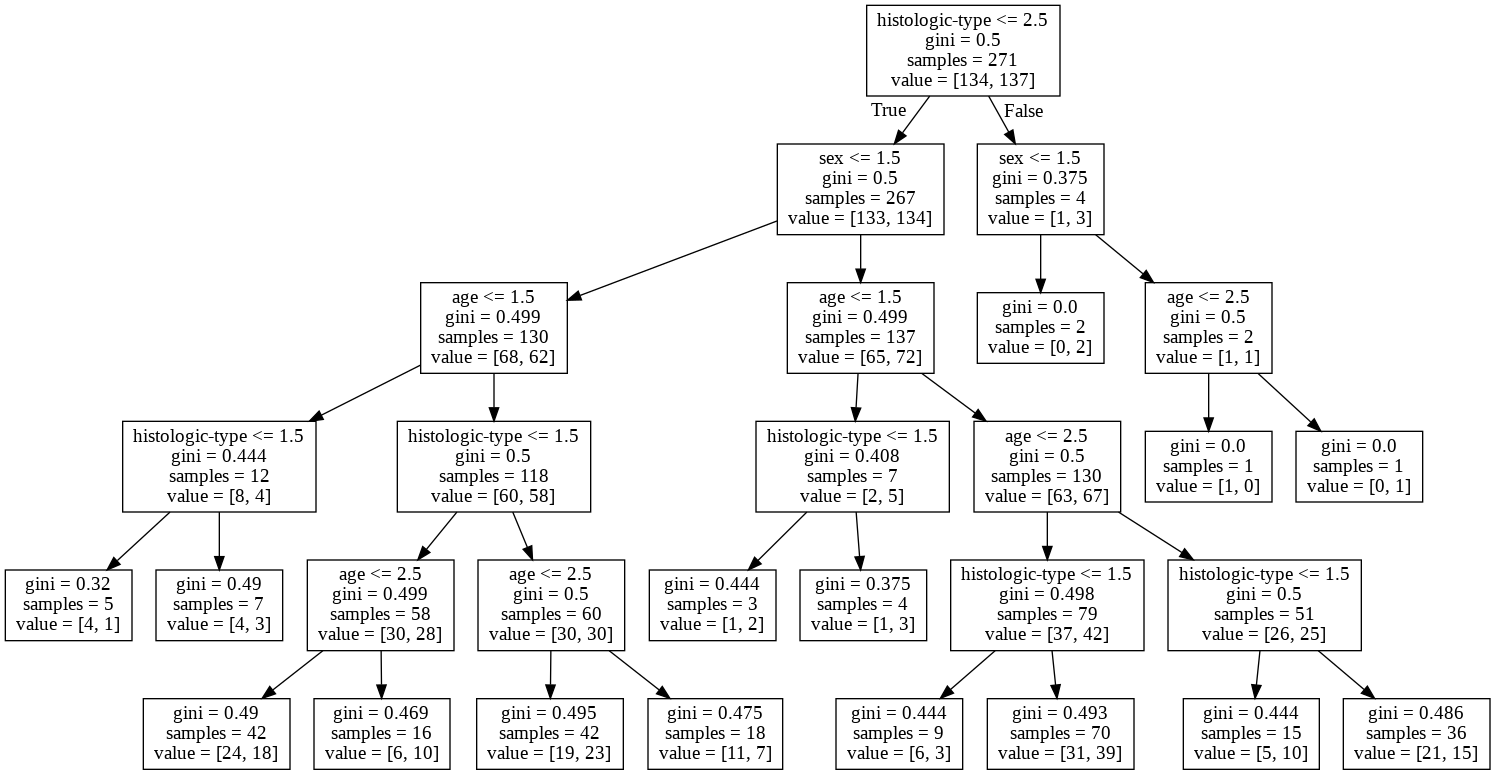

In [0]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn import tree
from pydotplus import graph_from_dot_data 

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_names)  
graph = graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

Measuring the accuracy of the resulting decision tree model using the test data...

In [0]:
clf.score(testing_inputs, testing_classes)

0.45588235294117646

Now instead of a single train/test split, we use **K-Fold cross validation** to get a better measure of our model's accuracy (K=10). 


In [0]:
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state=1)

cv_scores = cross_val_score(clf, all_features, all_classes, cv=10)

cv_scores.mean()

0.46613190730837795

Next:

**KNN**

Try K-Nearest-Neighbors. Hint: used neighbors. KNeighborsClassifier - Started with K = 10. 


In [0]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=10)
cv_scores = cross_val_score(clf, all_features, all_classes, cv=10)

cv_scores.mean()

0.4927807486631016

In [0]:
for n in range(1, 50):
    clf = neighbors.KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(clf, all_features, all_classes, cv=10)
    print (n, cv_scores.mean())

1 0.48966131907308375
2 0.49857397504456336
3 0.5016934046345811
4 0.5016042780748663
5 0.48689839572192517
6 0.5133689839572192
7 0.47789661319073085
8 0.4928698752228164
9 0.4928698752228164
10 0.4927807486631016
11 0.48992869875222816
12 0.4958110516934047
13 0.4958110516934047
14 0.49875222816399295
15 0.4958110516934046
16 0.48698752228163994
17 0.4722816399286988
18 0.47219251336898405
19 0.46051693404634586
20 0.4780748663101605
21 0.5016934046345811
22 0.47816399286987527
23 0.4546345811051694
24 0.4545454545454545
25 0.4457219251336898
26 0.4663101604278074
27 0.4604278074866309
28 0.4545454545454545
29 0.47816399286987527
30 0.4780748663101605
31 0.475222816399287
32 0.46336898395721915
33 0.4780748663101605
34 0.4663101604278076
35 0.47219251336898405
36 0.4663101604278074
37 0.4810160427807487
38 0.4810160427807487
39 0.4898395721925134
40 0.48689839572192517
41 0.47513368983957227
42 0.4780748663101605
43 0.4719251336898395
44 0.4719251336898395
45 0.4513368983957219
46 0.